In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv(r"C:\Users\kelvin\Downloads\archive (30)\raw_sales.csv",index_col=0,parse_dates=True)
data = data.dropna()
print('Shape of data',data.shape)
data.head()

Shape of data (29580, 4)


,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3


<AxesSubplot:xlabel='datesold'>

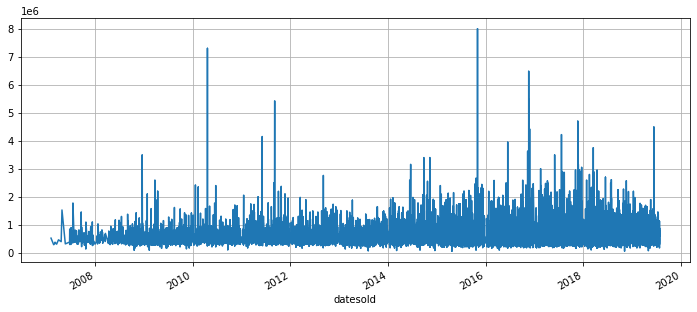

In [3]:
data['price'].plot(figsize=(12,5),grid=True)

In [4]:
from statsmodels.tsa.stattools import adfuller

def ad_tes(dataset):
    dftest = adfuller(dataset,autolag='AIC')
    print('1.ADF:',dftest[0])
    print('2. P-value:',dftest[1])
    print('3. Num of lags:',dftest[2])
    print('3. Num of the observations used for ADF Regression and critical values calculation:',dftest[3])
    print('5. Critical values:')
    
    for key,val in dftest[4].items():
        print("\t",key,":",val) 

In [5]:
ad_tes(data['price'])

1.ADF: -10.435026739473482
2. P-value: 1.5745251680571834e-18
3. Num of lags: 50
3. Num of the observations used for ADF Regression and critical values calculation: 29529
5. Critical values:
	 1% : -3.4305714727403305
	 5% : -2.8616378849073927
	 10% : -2.566822101159092


In [6]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [7]:
stepwise_fit = auto_arima(data['price'],trace=True,suppress_warnings = True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=16.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=830524.053, Time=0.96 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=826383.319, Time=1.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=821716.073, Time=7.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=830522.053, Time=0.70 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=14.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=15.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=23.53 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=821712.805, Time=6.59 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=9.72 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=9.51 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=826381.319, Time=1.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=14.77 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 122.022 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                29580
Model:               SARIMAX(0, 1, 1)   Log Likelihood             -410854.402
Date:                Mon, 03 Apr 2023   AIC                         821712.805
Time:                        22:59:01   BIC                         821729.395
Sample:                             0   HQIC                        821718.131
                              - 29580                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9874      0.001  -1394.110      0.000      -0.989      -0.986
sigma2      7.354e+10   2.28e-15   3.23e+25      0.000    7.35e+10    7.35e+10
===================================================================================
Ljung-Box (L1) (Q):                2946.89   Jarque-Bera (JB):           6030100.07
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                             4.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        72.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.16e+38. Standard errors may be unstable.
"""

In [8]:
from statsmodels.tsa.arima.model import ARIMA


In [9]:
print(data.shape)
train = data.iloc[:-30]
test = data.iloc[-30:]
print(train.shape,test.shape)

(29580, 4)
(29550, 4) (30, 4)


In [21]:
# from statsmodels.tsa.arima.model import ARIMA

# mod = sm.tsa.arima.ARIMA(endog,order=(1,0,0))
# res = mod.fit()
# print(res.summary())

In [10]:
model = ARIMA(train['price'],order=(0,0,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                29550
Model:                 ARIMA(0, 0, 1)   Log Likelihood             -410544.146
Date:                Mon, 03 Apr 2023   AIC                         821094.292
Time:                        22:59:06   BIC                         821119.174
Sample:                             0   HQIC                        821102.282
                              - 29550                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.099e+05   2290.790    266.255      0.000    6.05e+05    6.14e+05
ma.L1          0.3389      0.002    177.015      0.000       0.335       0.343
sigma2      7.036e+10      0.025    2.8e+12      0.000    7.04e+10    7.04e+10
===================================================================================
Ljung-Box (L1) (Q):                 137.87   Jarque-Bera (JB):           5013953.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                             3.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        66.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.84e+25. Standard errors may be unstable.
"""

In [11]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start,end=end,type='levels')

pred.index = data.index[start:end+1]

print(pred)

datesold
2019-07-12    559279.214462
2019-07-15    609934.581591
2019-07-16    609934.581591
2019-07-17    609934.581591
2019-07-17    609934.581591
2019-07-17    609934.581591
2019-07-17    609934.581591
2019-07-18    609934.581591
2019-07-18    609934.581591
2019-07-18    609934.581591
2019-07-18    609934.581591
2019-07-19    609934.581591
2019-07-23    609934.581591
2019-07-23    609934.581591
2019-07-23    609934.581591
2019-07-23    609934.581591
2019-07-23    609934.581591
2019-07-23    609934.581591
2019-07-24    609934.581591
2019-07-24    609934.581591
2019-07-25    609934.581591
2019-07-25    609934.581591
2019-07-25    609934.581591
2019-07-25    609934.581591
2019-07-25    609934.581591
2019-07-25    609934.581591
2019-07-25    609934.581591
2019-07-26    609934.581591
2019-07-26    609934.581591
2019-07-26    609934.581591
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='datesold'>

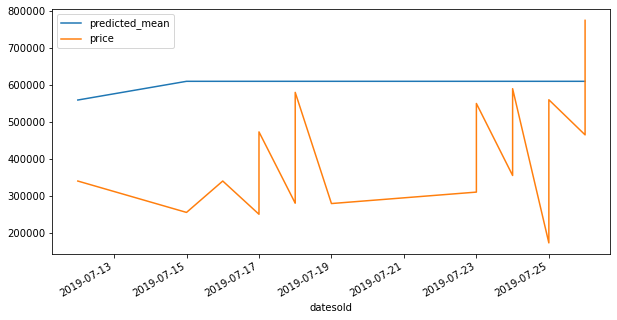

In [12]:
import matplotlib.pyplot as plt
pred.plot(legend=True,figsize=(10,5))
# plt.figure(figsize=(18,8))
test['price'].plot(legend=True)

In [13]:
test['price'].mean()

414391.6666666667

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['price']))
print(rmse)

236409.95380512928


In [15]:
model1 = ARIMA(data['price'],order = (0,0,1))
model1 = model1.fit()
data.tail()

,postcode,price,propertyType,bedrooms
datesold,,,,
2019-07-25,2900,500000,unit,3
2019-07-25,2612,560000,unit,2
2019-07-26,2912,464950,unit,2
2019-07-26,2601,589000,unit,2
2019-07-26,2612,775000,unit,2


In [16]:
index_future_dates = pd.date_range(start='2018-12-30',end='2019-01-29')
pred = model1.predict(start=len(data),end=len(data) + 30,type = 'levels').rename('ARIMA Predictions')
pred.index = index_future_dates

<AxesSubplot:>

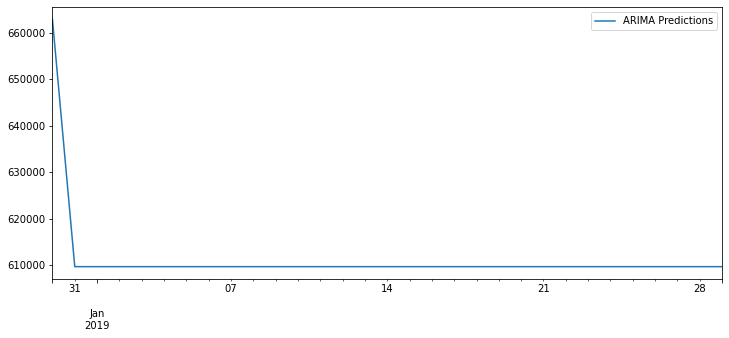

In [17]:
pred.plot(figsize=(12,5),legend=True)